Author: Rudra Panda

Q1) Load the dataset into a pandas dataframe and display the first 5 lines of the dataset along with the column headings.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#loading the dataset
dataset = pd.read_csv("data.csv")

#display the first 5 lines of the dataset along with the column headings
dataset.head(n=5)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


Q2) Display the number of instances for each class. That is, you should write code to find out how many instances you have for class 1, class 2, class 3, and class 4.

In [2]:
dataset.custcat.value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

Q3) Create histograms of columns age and income to visually explore their distributions.

(0.0, 140.0)

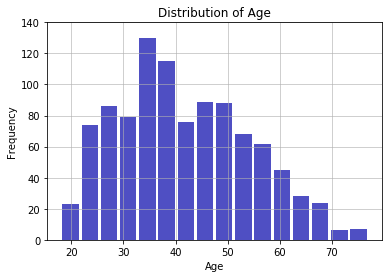

In [3]:
age = dataset.iloc[:,2].values
income = dataset.iloc[:,5].values

n, bins, patches = plt.hist(x=age, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='both', alpha=0.75)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

(0.0, 200.0)

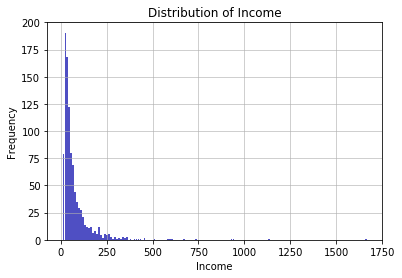

In [4]:
n, bins, patches = plt.hist(x=income, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='both', alpha=0.75)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Distribution of Income')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [5]:
#function that returns testing accuracy and misclassification rate for a given confusion matrix
def model_quality(confusion_matrix):
    #Testing accuracy and misclassification rate
    TP = np.diag(confusion_matrix)
    FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)
    FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
    TN = confusion_matrix.sum() - (TP+FP+FN)

    accuracy = (TP+TN) / (TP+FP+FN+TN)
    misclassification = (FN+FP) / (TP+FP+FN+TN)
    
    return accuracy, misclassification

Q4) Perform normalization of the data using standardization.

Q5) Split the dataset into training (80%) and testing set (20%).

In [6]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,11].values

#Splitting the data into Training Set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=0)

#Normalizing the features
from sklearn.preprocessing import StandardScaler
sc_X= StandardScaler()
X_train= sc_X.fit_transform(X_train)
X_test= sc_X.transform(X_test)

Q6) Model 1: Fit a logistic regression model. What is the testing misclassification rate you get?

In [7]:
#Fitting Logistic Regression to Training Set
from sklearn.linear_model import LogisticRegression
classifierObj= LogisticRegression(random_state=0)
classifierObj.fit(X_train, y_train)

#Making predictions on the Test Set
y_pred= classifierObj.predict(X_test)

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

#Testing accuracy and misclassification rate
accuracy, misclassification = model_quality(cm)

mean_mc = misclassification.mean()
print("Misclassification Rate: ", misclassification, "\n", "Average Misclassification Rate: ", mean_mc)

Misclassification Rate:  [0.3   0.31  0.325 0.275] 
 Average Misclassification Rate:  0.3025


Q7) Model 2: We will now fit k-NN. However for k-NN you need to specify the value for k. In order to figure that out, run k-NN with different values of k and compute the testing misclassification rate. Plot a chart with k on X-axis and testing error on the Y-axis. What is the lowest value of testing error and corresponding value of k?

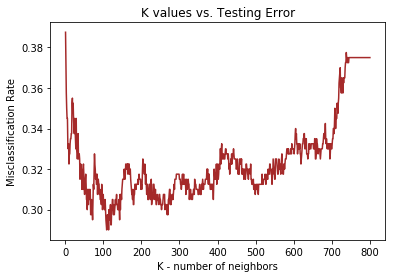

lowest value of testing error and corresponding value of k:  0.29 	 109 



In [8]:
#Fitting KNN Classifier to Training Set
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

#function that returns predicted values and confusion matrix 
#for given training and test data along with k (number of neighbors)
def KNeighbors_Classifier(Xtrain,yTrain,Xtest,yTest,neighbors):
    classifierObj= KNeighborsClassifier(n_neighbors=neighbors, p=2, metric='minkowski')
    classifierObj.fit(Xtrain, yTrain)

    #Making predictions on the Test Set
    yPred= classifierObj.predict(Xtest)

    #Evaluating the predictions using a Confusion Matrix
    cm = confusion_matrix(yTest, yPred)
    
    return yPred, cm


k_error = {} #dictionary that stores k and corresponding misclassification rate
for nbr in range(1, (len(X_train)+1)):
    y_pred, cm = KNeighbors_Classifier(X_train,y_train,X_test,y_test,nbr)

    #Testing accuracy and misclassification rate
    accuracy, misclassification = model_quality(cm)
    #error for the model is average of misclassification rates of class labels
    mean_mc = misclassification.mean() 
    k_error[nbr]=mean_mc

#Plot a chart with k on X-axis and testing error on the Y-axis.
k_error_list = sorted(k_error.items()) # sorted by key, return a list of tuples
k, mc = zip(*k_error_list) # unpack a list of pairs into two tuples
plt.plot(k, mc, color='brown')
plt.title("K values vs. Testing Error")
plt.xlabel("K - number of neighbors")
plt.ylabel("Misclassification Rate")
plt.show()

k_error_min = min(k_error.keys(), key=(lambda k: k_error[k]))
print("lowest value of testing error and corresponding value of k: ", k_error.get(k_error_min), "\t", k_error_min, "\n")

Q8) Model 3: Fit SVM model with different kernels. Which kernel gives the least testing error?

In [9]:
#Fitting SVM Classifier to Training Set.
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

def SVM_Classifier(Xtrain,yTrain,Xtest,yTest,kernel):
    classifierObj= SVC(kernel=kernel)
    classifierObj.fit(Xtrain, yTrain)
    
    #Making predictions on the Test Set
    yPred= classifierObj.predict(Xtest)

    #Evaluating the predictions using a Confusion Matrix
    cm = confusion_matrix(yTest, yPred)
    
    return yPred, cm

model_error = {} #dictionary that stores kernel and corresponding misclassification rate
kernel_options = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernel_options:
    y_pred, cm = SVM_Classifier(X_train,y_train,X_test,y_test,kernel)

    #Testing accuracy and misclassification rate
    accuracy, misclassification = model_quality(cm)
    #error for the model is average of misclassification rates of class labels
    mean_mc = misclassification.mean() 
    model_error[kernel]=mean_mc

kernel_with_least_error = min(model_error.keys(), key=(lambda kernel: model_error[kernel]))

print("lowest value of testing error and corresponding value of kernel: ", model_error.get(kernel_with_least_error), "\t", kernel_with_least_error, "\n")

lowest value of testing error and corresponding value of kernel:  0.305 	 linear 



Q9) Model 4: Fit Naïve Bayes model. What is the testing error you get?

In [10]:
#Fitting NaiveBayes to Training Set.
from sklearn.naive_bayes import GaussianNB
classifierObj= GaussianNB()
classifierObj.fit(X_train, y_train)

#Making predictions on the Test Set
y_pred= classifierObj.predict(X_test)

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

#Testing accuracy and misclassification rate
accuracy, misclassification = model_quality(cm)

mean_mc = misclassification.mean()
print("Misclassification Rate: ", misclassification, "\n", "Average Misclassification Rate: ", mean_mc)

Misclassification Rate:  [0.44  0.265 0.285 0.21 ] 
 Average Misclassification Rate:  0.3


Q10) Model 5: Fit Random Forest model. For Random Forest, you need to specify the number of trees (n_estimators). In order to figure that out, run Random Forest with different values of n_estimators and compute the testing misclassification rate. Plot a chart with n_estimators on X-axis and testing error on the Y-axis. What is the lowest value of testing error and corresponding value of n_estimators?

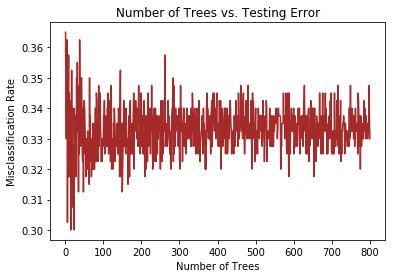

lowest value of testing error and corresponding value of n_estimators:  0.335 	 15 



In [11]:
#Fitting Random Forest Classifier to Training Set.
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

def Random_Forest_Classifier(Xtrain,yTrain,Xtest,yTest,n_trees):
    classifierObj= RandomForestClassifier(n_estimators=n_trees, criterion='entropy')
    classifierObj.fit(Xtrain, yTrain)
    
    #Making predictions on the Test Set
    yPred= classifierObj.predict(Xtest)

    #Evaluating the predictions using a Confusion Matrix
    cm = confusion_matrix(yTest, yPred)
    
    return yPred, cm

model_error = {} #dictionary that stores number of trees and corresponding misclassification rate

for n_trees in range(1, (len(X_train)+1)):
    y_pred, cm = Random_Forest_Classifier(X_train,y_train,X_test,y_test,n_trees)

    #Testing accuracy and misclassification rate
    accuracy, misclassification = model_quality(cm)
    #error for the model is average of misclassification rates of class labels
    mean_mc = misclassification.mean() 
    model_error[n_trees]=mean_mc


#Plot a chart with number of trees on X-axis and testing error on the Y-axis.
model_error_list = sorted(model_error.items()) # sorted by key, return a list of tuples
ne, mc = zip(*model_error_list) # unpack a list of pairs into two tuples
plt.plot(ne, mc, color='brown')
plt.title("Number of Trees vs. Testing Error")
plt.xlabel("Number of Trees")
plt.ylabel("Misclassification Rate")
plt.show()
    
n_trees_with_least_error = min(model_error.keys(), key=(lambda ne: model_error[ne]))
print("lowest value of testing error and corresponding value of n_estimators: ", k_error.get(n_trees_with_least_error), "\t", n_trees_with_least_error, "\n")

Q11) Predicting with Ensemble: Now that you have built 5 models. Loop over the testing set. For every test instance, have each of the models predict the class label. Eventual class predicted will be based on a majority vote of the 5 models. What is the testing misclassification rate you get with the ensemble model?

In [12]:
#Logistic Regression prediction
lrObj= LogisticRegression(random_state=0)
lrObj.fit(X_train, y_train)
y_pred_lr= lrObj.predict(X_test)

#k-nn prediction
knnObj= KNeighborsClassifier(n_neighbors=k_error_min, p=2, metric='minkowski')
knnObj.fit(X_train, y_train)
y_pred_knn= knnObj.predict(X_test)

#SVM prediction
svcObj= SVC(kernel=kernel_with_least_error)
svcObj.fit(X_train, y_train)
y_pred_svc= svcObj.predict(X_test)

#NaiveBayes prediction
gnbObj= GaussianNB()
gnbObj.fit(X_train, y_train)
y_pred_gnb= gnbObj.predict(X_test)

#Random Forestr prediction
rfObj= RandomForestClassifier(n_estimators=n_trees_with_least_error, criterion='entropy')
rfObj.fit(X_train, y_train)
y_pred_rf= rfObj.predict(X_test)

y_pred_ensemble = []

for t in range(0, len(X_test)):
    #majority vote
    class_vote_count = {}
    class_vote_count[1] = 0
    class_vote_count[2] = 0
    class_vote_count[3] = 0
    class_vote_count[4] = 0
    
    class_vote_count[y_pred_lr[t]] = class_vote_count.get(y_pred_lr[t]) + 1
    class_vote_count[y_pred_knn[t]] = class_vote_count.get(y_pred_knn[t]) + 1
    class_vote_count[y_pred_svc[t]] = class_vote_count.get(y_pred_svc[t]) + 1
    class_vote_count[y_pred_gnb[t]] = class_vote_count.get(y_pred_gnb[t]) + 1
    class_vote_count[y_pred_rf[t]] = class_vote_count.get(y_pred_rf[t]) + 1
    
    class_label_with_max_vote = max(class_vote_count.keys(), key=(lambda cl: class_vote_count[cl]))
    y_pred_ensemble.append(class_label_with_max_vote)

cm_en = confusion_matrix(y_test, y_pred_ensemble)
accuracy, misclassification = model_quality(cm_en)
#error for the model is average of misclassification rates of class labels
mean_mc = misclassification.mean() 
print("Ensemble average misclassification rate: ", mean_mc)

Ensemble average misclassification rate:  0.3025
